### Урок 7. Многомерный статистический анализ. Линейная регрессия
#### Задача 1
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [1]:
import numpy as np
import pandas as pd

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.int32)
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.int32)
df = pd.DataFrame([np.transpose(salary), np.transpose(scoring)], index=['salary', 'scoring']).T
df

,salary,scoring
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.
1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

Здесь $x$, $y$ — данные из выборки, $\overline{x}$ обозначает выборочное среднее.
y = scoring, x = salary

In [3]:
b1 = (np.mean(salary * scoring) - np.mean(scoring) * np.mean(salary)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

$$y = 444.17 + 2.62 \cdot x,$$

$$scoring = salary \cdot b_1 + b_0,$$

$$b = (X^\top X)^{-1} X^\top scoring.$$

In [5]:
salary.T

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [6]:
X = np.hstack((np.ones((salary.shape[0], 1)), salary.reshape(-1, 1)))
X

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [7]:
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(scoring)
b

array([444.17735732,   2.62053888])

2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

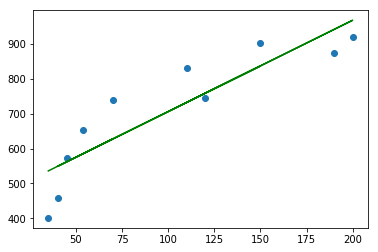

In [22]:
from matplotlib import pyplot as plt
plt.scatter(salary, scoring)
plt.plot(salary, b0+b1*salary, color='green');

3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

In [9]:
np.corrcoef(scoring, b0+b1*salary)[1][0]**2

0.7876386635293682

In [10]:
(b0+b1*salary).var()/scoring.var()

0.7876386635293678

In [11]:
np.abs((scoring - (b0+b1*salary)) / scoring).mean()

0.11469251843561709

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

In [12]:
k1 = 1
k2 = salary.shape[0] - k1 - 1
r2 = (b0+b1*salary).var()/scoring.var()
T = (r2/(1-r2)*k2/k1)
T

29.67164085966437

In [13]:
from scipy import stats

In [14]:
F_crit = stats.f.ppf(1-0.05, k1, k2)
print(F_crit)

5.317655071578714


In [15]:
T>F_crit

True

5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [16]:
S_slope = np.sqrt(
    ((scoring-(b0+b1*salary))**2).sum()/(salary.shape[0]-2) / 
    ((salary-salary.mean())**2).sum()
)
S_slope

0.48108279568516005

Зададим уровень значимости  𝛼=0.05 . В нашем случае  𝑛=10 , поэтому нас интересует квантиль  𝑡1−0.05/2,8=2.306 . Значение статистики  𝑇 :

In [17]:
T = b1/S_slope
T

5.447168150485579

In [18]:
t=2.306
(b1-t*S_slope, b1+t*S_slope)

(1.5111619555527858, 3.729915809252744)

In [19]:
S_inter = S_slope*np.sqrt((salary**2).mean())
S_inter

56.46649755068153

In [20]:
T = b0/S_inter
T

7.866210524668863

In [21]:
(b0 - t*S_inter, b0+t*S_inter)

(313.965613972488, 574.3891006762312)

Задача 2
В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

Значения функции Лапласа используются, когда необходимо оценить вероятности попадания нормально распределенного значения с известными параметрами распределения в заданный интервал, а распределение Стьюдента используется для оценки параметров выборки